26/05/2022

## Práctica Spline: Logo "GhostBusters"

Antonio Javier Rodríguez Romero y Santiago López Cerro

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def SplineNatural (x, y): 
    
    "Devuelve la matriz nx4 de los coeficientes del polinomio"
    "Cada fila corresponde a un polinomio"
    
    # Declaración de variables
    n = len(x)
    A=np.zeros([n,n])
    b = np.zeros(n) 
    h = np.zeros(n-1)
    pendiente = np.zeros(n-1)
    d = np.zeros(n)
    spline = np.zeros([n-1,4]) 
    
    # Cálculo de las longitudes y las pendientes
    for i in range (0, n-1):
        h[i] = x[i+1]-x[i]
        pendiente[i] = (y[i+1] - y[i]) / h[i] 
    
    # Creación de la matriz de coeficientes    
    A[0][0] = 2/h[0]
    A[0][1] = 1/h[0]
    
    A[n-1][n-1] = 2/h[n-2]
    A[n-1][n-2] = 1/h[n-2]
    
    for j in range (1,n-1):
        
        A[j][j] = 2*((1/h[j])+(1/h[j-1]))
        A[j][j-1] = 1/h[j-1]
        A[j][j+1] = 1/h[j]
    
    # Creación del array de términos independientes
    b[0] = pendiente[0] / h[0]
    b[n-1] = pendiente[n-2] / h[n-2]
    
    for k in range (1,n-1):
        b[k] = (pendiente[k] / h[k]) + (pendiente [k-1]/ h[k-1])
    b = 3*b
    
    # Obtención de las derivadas
    d = np.linalg.solve(A,b)
    
   # Cálculo de polinomios
    for i in range (0,n-1) : 
        spline [i][0] = y[i]
        spline [i][1] = d[i]
        spline [i][2] = (pendiente[i]-d[i])/h[i]
        spline [i][3] = ((d[i]+d[i+1])-2*pendiente[i])/(h[i]**2)
        
    return spline

In [4]:
def plotspline (x,y,color):
    
    n = len(x) # Número de puntos de x e y (= dimensión)
    
    t = np.arange (0,n,1) # t en [0, N]
    
    # Construimos una curva paramétrica
    # c(t) = (x(t), y(t))
    
    sx = SplineNatural (t,x)
    sy = SplineNatural (t,y)
    
    # Puntos donde estudiamos la curva
    p = np.arange (0,n-1,0.001)
    
    _x = np.zeros (len(p)+len(sx)-(n-1))
    _y = np.zeros (len(p)+len(sy)-(n-1))
    
    # Cálculo de arrays (_x, _y) a representar
    for i in range (0,len(t)):
        for j in range (0,len(p)):
            if (i <= p[j] and p[j] < i+1):
                _x[j] = sx[i][0] + sx[i][1]*(p[j]-t[i])+sx[i][2]*(p[j]-t[i])**2+sx[i][3]*(p[j]-t[i]**2)*(p[j]-t[i+1])
                _y[j] = sy[i][0] + sy[i][1]*(p[j]-t[i])+sy[i][2]*(p[j]-t[i])**2+sy[i][3]*(p[j]-t[i]**2)*(p[j]-t[i+1])
    
    return plt.plot(_x,_y,color)

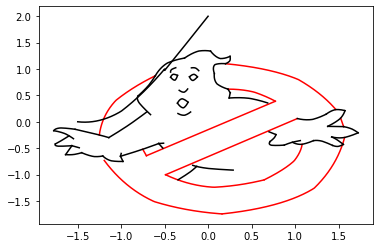

In [7]:
# CIRCULO EXTERIOR
x = [-1.1952,-0.6197,0.1604]
y = [-0.7322,-1.5125,-1.7454]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

x = [0.1604,1.2197,1.5701]
y = [-1.7454,-1.2588,-0.2977]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

x = [1.5248,1.5586]
y = [0.0685,-0.0917]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

x = [0.2,1.0370,1.4696]
y = [1.1,0.8010,0.2313]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

x = [-1.2517,-1.0607,-0.6078]
y = [-0.2501,0.4056,0.8713]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

#CIRCULO INTERIOR+LINEA
x = [-0.4899,0.0672,0.6442]
y = [-1.003,-1.2404,-1.1010]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

x = [0.6442,0.9905,1.0817]
y = [-1.1010,-0.7390,-0.4269]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

    #LINEA
x = [-0.4899,1.0262]
y = [-1.0038,0.0610]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')
x = [-0.7100,0.7740]
y = [-0.6432,0.3894]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

x = [-0.7523,-0.7100]
y = [-0.5207,-0.6432]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

x = [0.2282,0.5319,0.7740]
y = [0.6182,0.5606,0.3894]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'r')

#FANTASMA(Tronco)

x = [-0.1769,0.00417,0.2883]
y = [-0.8252,-0.8845,-0.9157]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.3462,-0.2022,-0.1302]
y = [-1.1001,-0.9450,-0.8436]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

#FANTASMA(Mano derecha)

x = [0.7009,0.7806]
y = [-0.1903,-0.2424]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.7124,0.7630,0.7806]
y = [-0.3749,-0.2990,-0.2424]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.7124,0.7292,0.8754]
y = [-0.3749,-0.4452,-0.4423]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.8754,0.9696,1.0609]
y = [-0.4423,-0.3876,-0.3566]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.9696,1.0817,1.2126]
y = [-0.3876,-0.4269,-0.3573]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [1.2126,1.3112,1.4321]
y = [-0.3573,-0.3677,-0.4482]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [1.4321,1.4975,1.5557]
y = [-0.4482,-0.4667,-0.4287]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [1.4215,1.4848,1.5557]
y = [-0.2869,-0.3426,-0.4287]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [1.4215,1.5701,1.7261]
y = [-0.2869,-0.2977,-0.2089]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [1.5586,1.6567,1.7261]
y = [-0.0917,-0.1384,-0.2089]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [1.3758,1.5586]
y = [-0.0870,-0.0917]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [1.3758,1.5248,1.5742]
y = [-0.0870,0.0685,0.2110]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

# FANTASMA (Cabeza)
x = [1.3583,1.4696,1.5742]
y = [0.1445,0.2313,0.2110]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [1.0262,1.2021,1.3583]
y = [0.0610,0.0449,0.1445]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.2419,0.4829,0.6852]
y = [0.4503,0.4422,0.3564]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.2419,0.2541]
y = [0.4503,0.5503]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.2282,0.2541]
y = [0.6182,0.5503]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.0713,0.1026,0.2282]
y = [0.9142,0.7168,0.6182]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.0713,0.0786,0.2]
y = [0.9142,1.0828,1.1]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.2,0.2513,0.2519]
y = [1.1,1.1598,1.2393]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [0.0273,0.1397,0.2519]
y = [1.3393,1.1974,1.2393]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.2717,-0.1080,0.0273]
y = [1.2063,1.3400,1.3393]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.6078,-0.4690,-0.2717]
y = [0.8713,1.1127,1.2063]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.8056,-0.6833,-0.6078]
y = [0.4904,0.6929,0.8713]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.8056,-0.7925,-0.6621]
y = [0.4904,0.3552,0.1349]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

# FANTASMA (Brazo izquierdo)

x = [-1.1427,-0.9010,-0.7087]
y = [-0.2999,-0.0477,0.1826]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.5310,-1.2517,-1.1427]
y = [-0.1419,-0.2501,-0.2999]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.7756,-1.6976,-1.5310]
y = [-0.1688,-0.1169,-0.1419]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.7756,-1.6419,-1.54910]
y = [-0.1688,-0.2282,-0.3210]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.7575,-1.6759,-1.6015]
y = [-0.4199,-0.3443,-0.2679]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.7575,-1.7243,-1.5670]
y = [-0.4199,-0.4623,-0.4532]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.5670,-1.4823]
y = [-0.4532,-0.4925]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.6396,-1.6033,-1.5670]
y = [-0.6226,-0.5379,-0.4532]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.6396,-1.5428,-1.4550]
y = [-0.6226,-0.6196,-0.5863]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.4550,-1.3124,-1.2119]
y = [-0.5863,-0.6592,-0.6477]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.2119,-1.1143,-0.9793]
y = [-0.6477,-0.7396,-0.7511]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.0081,-0.9793]
y = [-0.6535,-0.7511]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.0081,-1]
y = [-0.6535,-0.6]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-1.0081,-0.7523,-0.5687]
y = [-0.6535,-0.5207,-0.4120]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.5687,-0.5127]
y = [-0.4120,-0.4059]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.5687,-0.5208]
y = [-0.4120,-0.4992]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

#DETALLES
x = [-0.3471,-0.2683,-0.2014]
y = [0.1561,0.1246,0.1856]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.3530,-0.2978,-0.2309]
y = [0.3529,0.4356,0.3707]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.3530,-0.2821,-0.2309]
y = [0.3529,0.2644,0.3707]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.3328,-0.2743,-0.2353]
y = [0.5956,0.5610,0.6216]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.4320,-0.4194,-0.3724]
y = [0.9409,0.9911,1.0240]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.1922,-0.1423,-0.1079]
y = [1.0213,1.0161,0.9679]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.4315,-0.4,-0.3523]
y = [0.8439,0.9,0.8784]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.4315,-0.3799,-0.3523]
y = [0.8439,0.7889,0.8784]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.2146,-0.1613,-0.1234]
y = [0.8508,0.8990,0.8508]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x = [-0.2146,-0.1733,-0.1234]
y = [0.8508,0.7820,0.8508]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')

x= [-1.5, -1, -0.5, 0]
y= [0,0.2,1,2]
ptsx=np.array(x)
ptsy=np.array(y)
plotspline(ptsx,ptsy,'k')